# EDA with Python
---


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('train.csv')

In [81]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [82]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

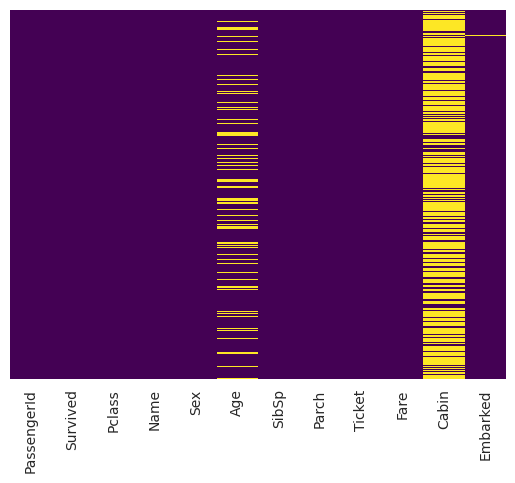

In [83]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

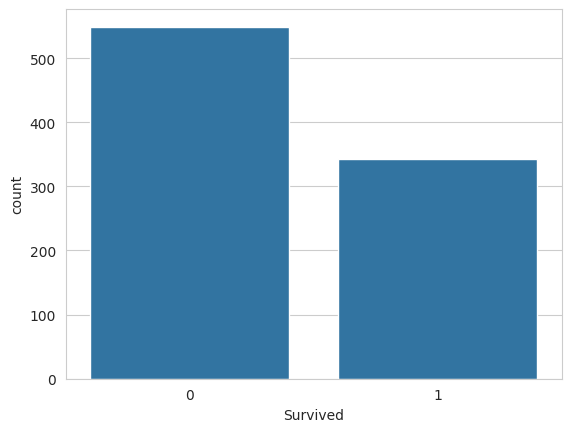

In [84]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

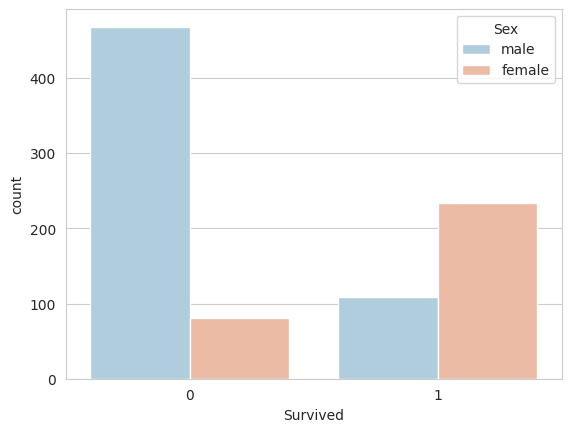

In [85]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'RdBu_r')
# hue sex will analyze data with the help of sex

<Axes: xlabel='Survived', ylabel='count'>

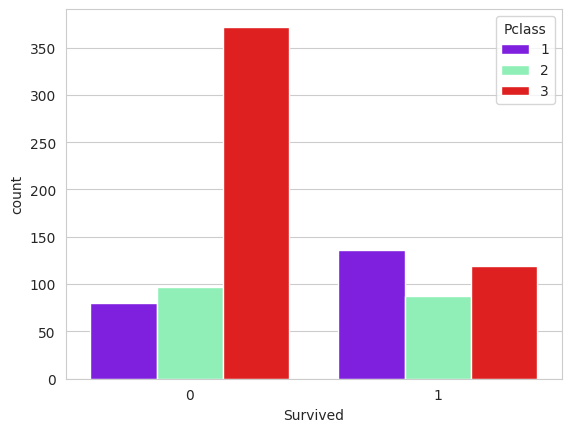

In [86]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data=df, palette = 'rainbow')

<ipython-input-87-47a822bedc42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde = False, color = 'darkred', bins = 30)


<Axes: xlabel='Age'>

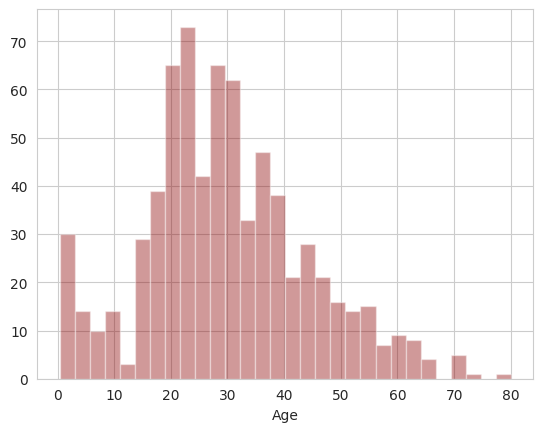

In [87]:
sns.distplot(df['Age'].dropna(),kde = False, color = 'darkred', bins = 30)

<Axes: xlabel='SibSp', ylabel='count'>

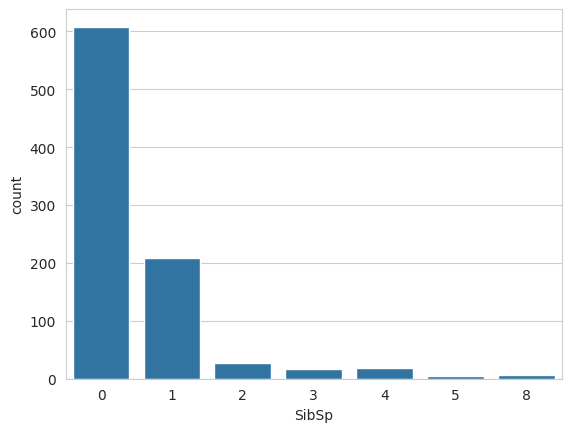

In [88]:
sns.countplot(x = 'SibSp', data = df)

# Data Cleaning

<ipython-input-89-e0274e3b61e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y = 'Age', data = df, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

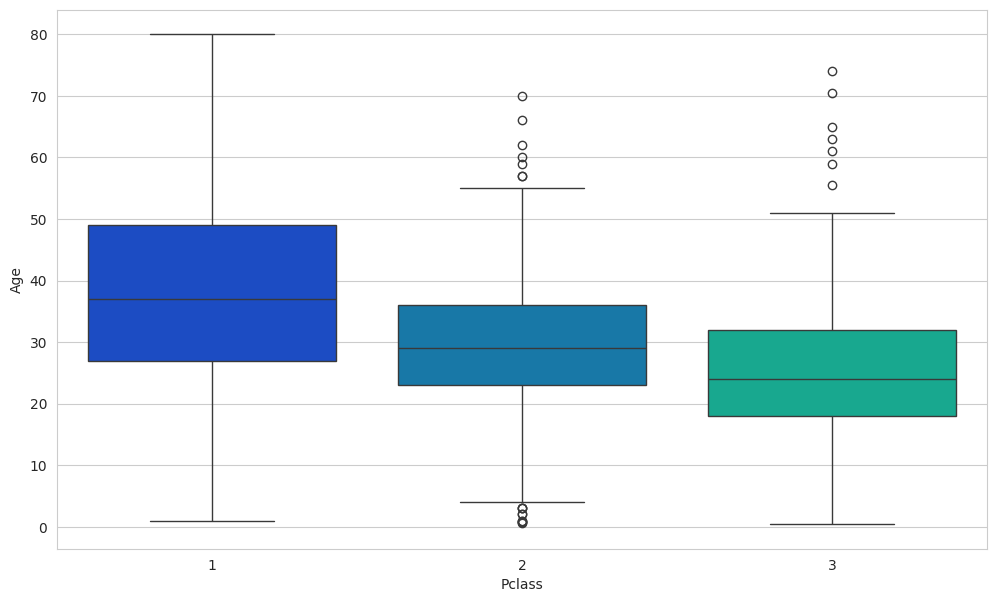

In [89]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y = 'Age', data = df, palette='winter')

In [90]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [91]:
df['Age']= df[['Age','Pclass']].apply(impute_age, axis =1)

<ipython-input-90-00266cbeecf8>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-90-00266cbeecf8>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [92]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [93]:
df.drop('Cabin', axis = 1, inplace = True)

In [94]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [95]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [96]:
df.dropna(inplace = True)

In [97]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

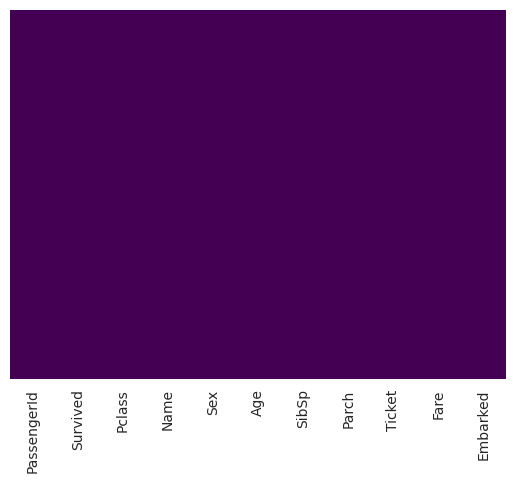

In [98]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [100]:
embark = pd.get_dummies(df['Embarked'], drop_first=True).astype(int).head()


In [101]:
sex = pd.get_dummies(df['Sex'],drop_first=True).astype(int).head()

In [102]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [103]:
sex

,male
0,1
1,0
2,0
3,0
4,1
